# (2, 4) and (2, 3) AB-trees comparison

In [32]:
import os
import pandas as pd


def get_result_data(case, tree, out_path="out"):
    filename = f"t-{case}-{tree[0]}-{tree[1]}"
    filepath = os.path.join(out_path, filename)
    cols =  ["n", "struct_changes_per_op"]
    return pd.read_csv(filepath, sep=" ", header=None, names=cols)


insert_23_df = get_result_data("insert", "23")
insert_24_df = get_result_data("insert", "24")
min_23_df = get_result_data("min", "23")
min_24_df = get_result_data("min", "24")
random_23_df = get_result_data("random", "23")
random_24_df = get_result_data("random", "24")

In [33]:
import matplotlib.pyplot as plt

def plot_test(df23, df24, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df23["n"], df23["struct_changes_per_op"], label="2-3 tree", marker="v")
    plt.plot(df24["n"], df24["struct_changes_per_op"], label="2-4 tree", marker="x")

    plt.xlabel("Set Size (n)")
    plt.ylabel("Structural Changes per operation")
    plt.title(title)
    plt.legend()
    plt.show()


## Insert test

Insert n elements in random order.


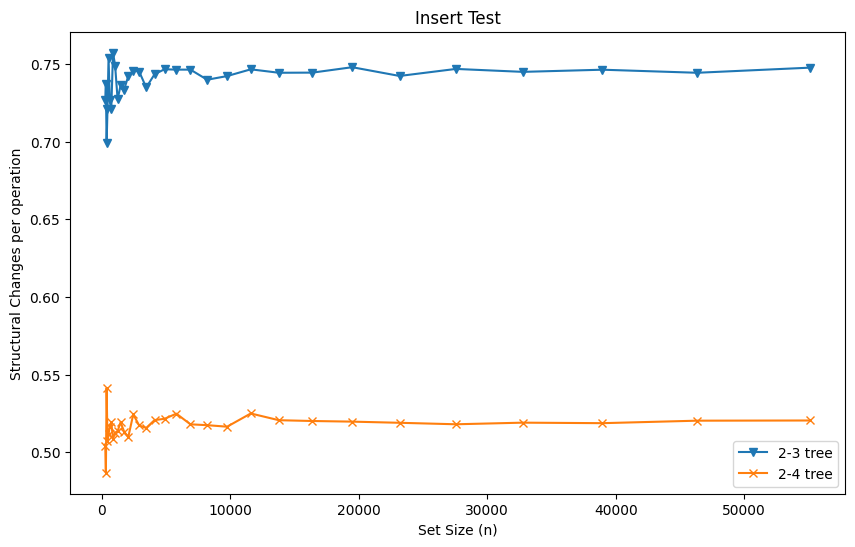

In [34]:
plot_test(insert_23_df, insert_24_df, "Insert Test")

## Interpretation

From the results above, we observe that both the (2,3)-tree and the (2,4)-tree stay around a particular value.

The complexity of an insert operation is O(log⁡(n) b log⁡(a)) (as discussed in lecture 3). When inserting an item into the tree, it’s possible that the target node, where the new item would be placed, is already full of children. This necessitates rebalancing of the node following the insertion. Similar to the observations made in the min tests, the (2,3)-tree undergoes more structural adjustments compared to the (2,4)-tree. This difference arises from the (2,3)-tree's higher sensitivity to variations in the number of children within its nodes.

However, splitting a node can propagate upwards, potentially causing splits in its parent and further up the tree, possibly reaching the root. The worst-case scenario occurs during sequential insertions, where each insertion targets the rightmost position at the lowest level of the tree.

Initially, a node begins with aa children and requires a split when it exceeds bb children. At the lowest level, structural adjustments occur every (b−a)(b−a)-th insertion. The parent node is reconstructed every (b−a)⋅2(b−a)⋅2-th insertion, its parent every (b−a)⋅3-th insertion, and so forth. The average number of structural changes per operation is the cumulative sum of averages across all tree levels. This can be expressed as the series from i = 1 to inf of 1/((b−a)⋅i)​.

This infinite series is known to converge to a value less than or equal to 1, as evidenced by incremental test cases. Consequently, the maximum number of structural changes per operation is bounded by 1 in the worst case.

## Min test

Insert n elements sequentially and then n times repeat: remove the minimal element in the tree and then insert it back.

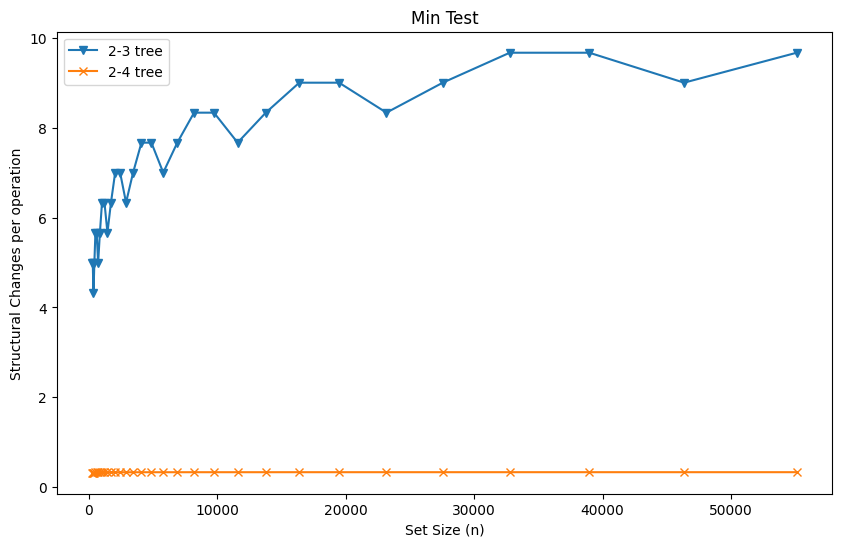

In [35]:
plot_test(min_23_df, min_24_df, "Min Test")

## Interpretation

The results demonstrate that the (2,3)-tree is considerably less stable compared to the (2,4)-tree. A distinct pattern emerges in the (2,3)-tree's y-growth, which shows periodic fluctuations every 4th size step. In contrast, the (2,4)-tree exhibits consistently stable performance.

In general, the time complexity for the operations of insertion and removal is O(log⁡(n)⋅b/log⁡(a)), as discussed in lecture 3.

The increasing average number of structural changes per insertion and removal in the (2,3)-tree as the number of elements grows is tied to the tree's sensitivity to changes in its node structure. Each node in a (2,3)-tree can only contain between 2 and 3 children, making it highly reactive to variations in its child count. During removal, a structural change is avoided only if the node has exactly 2 children. Otherwise, the tree must be rebalanced. This sensitivity extends to all nodes along the path from the root, meaning that structural adjustments often cascade from the root down to the minimal item, leading to frequent rebalancing along the entire path.

In contrast, the (2,4)-tree, which allows each node to contain 2 to 4 children, is much less sensitive to individual changes. The removal of a single item typically results in localized rebalancing at the lowest level. This rebalancing is independent of the overall size of the tree, which contributes to its stability and efficiency.

The periodic y-growth pattern in the (2,3)-tree is likely connected to the total number of items in the tree. Certain tree sizes may lead to different distributions of keys among top-level nodes, affecting their structure. Since rebalancing occurs only when a node has fewer than 2 children, the pattern may reflect cases where the top-level nodes have sufficient keys, temporarily reducing the need for structural adjustments at certain tree sizes.

## Random test
    
Insert n elements sequentially and then n times repeat: remove random element from the tree and then insert random element into the tree. Removed element is always present in the tree and inserted element is always not present in the tree.

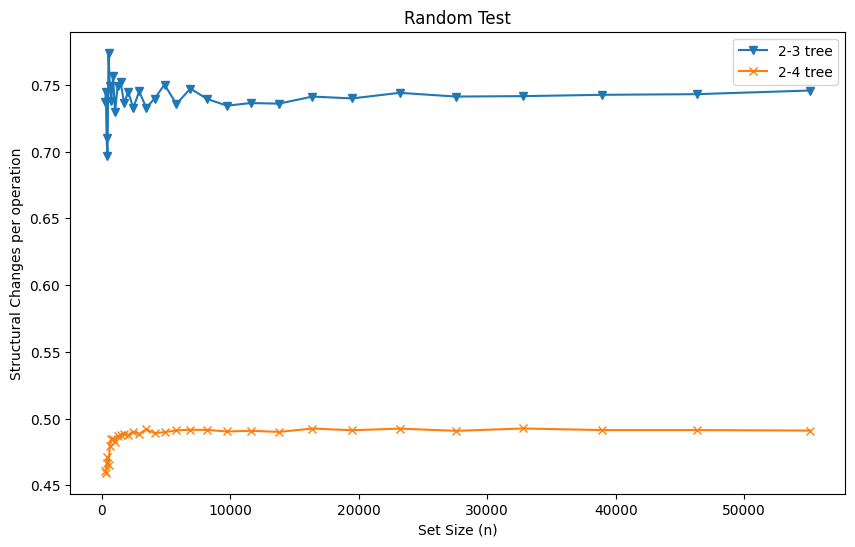

In [36]:
plot_test(random_23_df, random_24_df, "Random Test")

## Interpretation

From the results above, two key observations can be made:

1. The (2,4)-tree consistently experiences fewer average structural changes per operation compared to the (2,3)-tree.  
2. The (2,3)-tree exhibits greater oscillation in structural changes than the (2,4)-tree.

The reasons behind these behaviors have already been discussed earlier. What is worth emphasizing here, however, is the role of the random insertion and deletion operations in these tests. The random insertion operation, which was part of the previous test, again demonstrates that the (2,4)-tree performs better. In both cases, structural changes per operation are upper bounded by 1. The difference arises in how the random deletion operation behaves.

During a random deletion, if a node ends up with too few children, it merges with another child of the same parent. This reduces the number of children in the parent node, which may trigger recursive rebalancing up the tree. Despite this, the principle governing the number of times this operation might occur remains unchanged.

In summary, both random operations—insertions and deletions—adhere to the same fundamental principle: every \( (b-a) \)-th execution necessitates a structural change in the node.